Correlation Analysis & Logistic Regression on Breast Cancer data

1.  Data Collection
2.  Data Cleansing
3.  train/test data separation
4.  Building Models
5.  Model evaluation
6.  Forecasting

In [ ]:
!pip install scikit-learn==1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# 1. Data Collection

---



In [ ]:
# Data Load
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
bc_data=load_breast_cancer()

In [ ]:
#breast cancer data exploration ==> total 569 instances, 30 attributes,
print(bc_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# data example
bc_df=pd.DataFrame(bc_data.data, columns = bc_data.feature_names)
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Diagnosis feature 추가 ==>  Diagnosis: 0 as Benign, 1 as Malignance
bc_df['Diagnosis'] = bc_data.target
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# check if there are null values ==> no null values
bc_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Diagnosis                  0
dtype: int64

In [ ]:
#data shape check ==> 569개 data rows, 31개 features incl. Diagnosis
print(bc_df.shape)

(569, 31)


In [ ]:
#count number of obvs in each class  ==> 357개의 Benign case, 212개 Malignant case
bc_df['Diagnosis'].value_counts()

1    357
0    212
Name: Diagnosis, dtype: int64

In [ ]:
benign, malignant = bc_df['Diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(bc_df) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(bc_df) * 100, 2), '%')

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


In [ ]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Diagnosis', ylabel='count'>

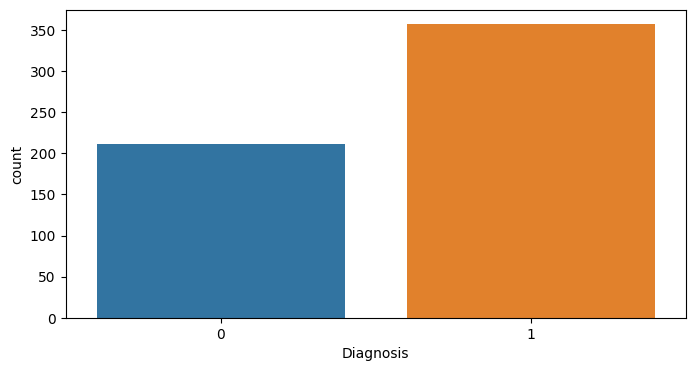

In [ ]:
#Benign, Malignant case with column chart
plt.figure(figsize=(8, 4))
sns.countplot(x=bc_df['Diagnosis'])

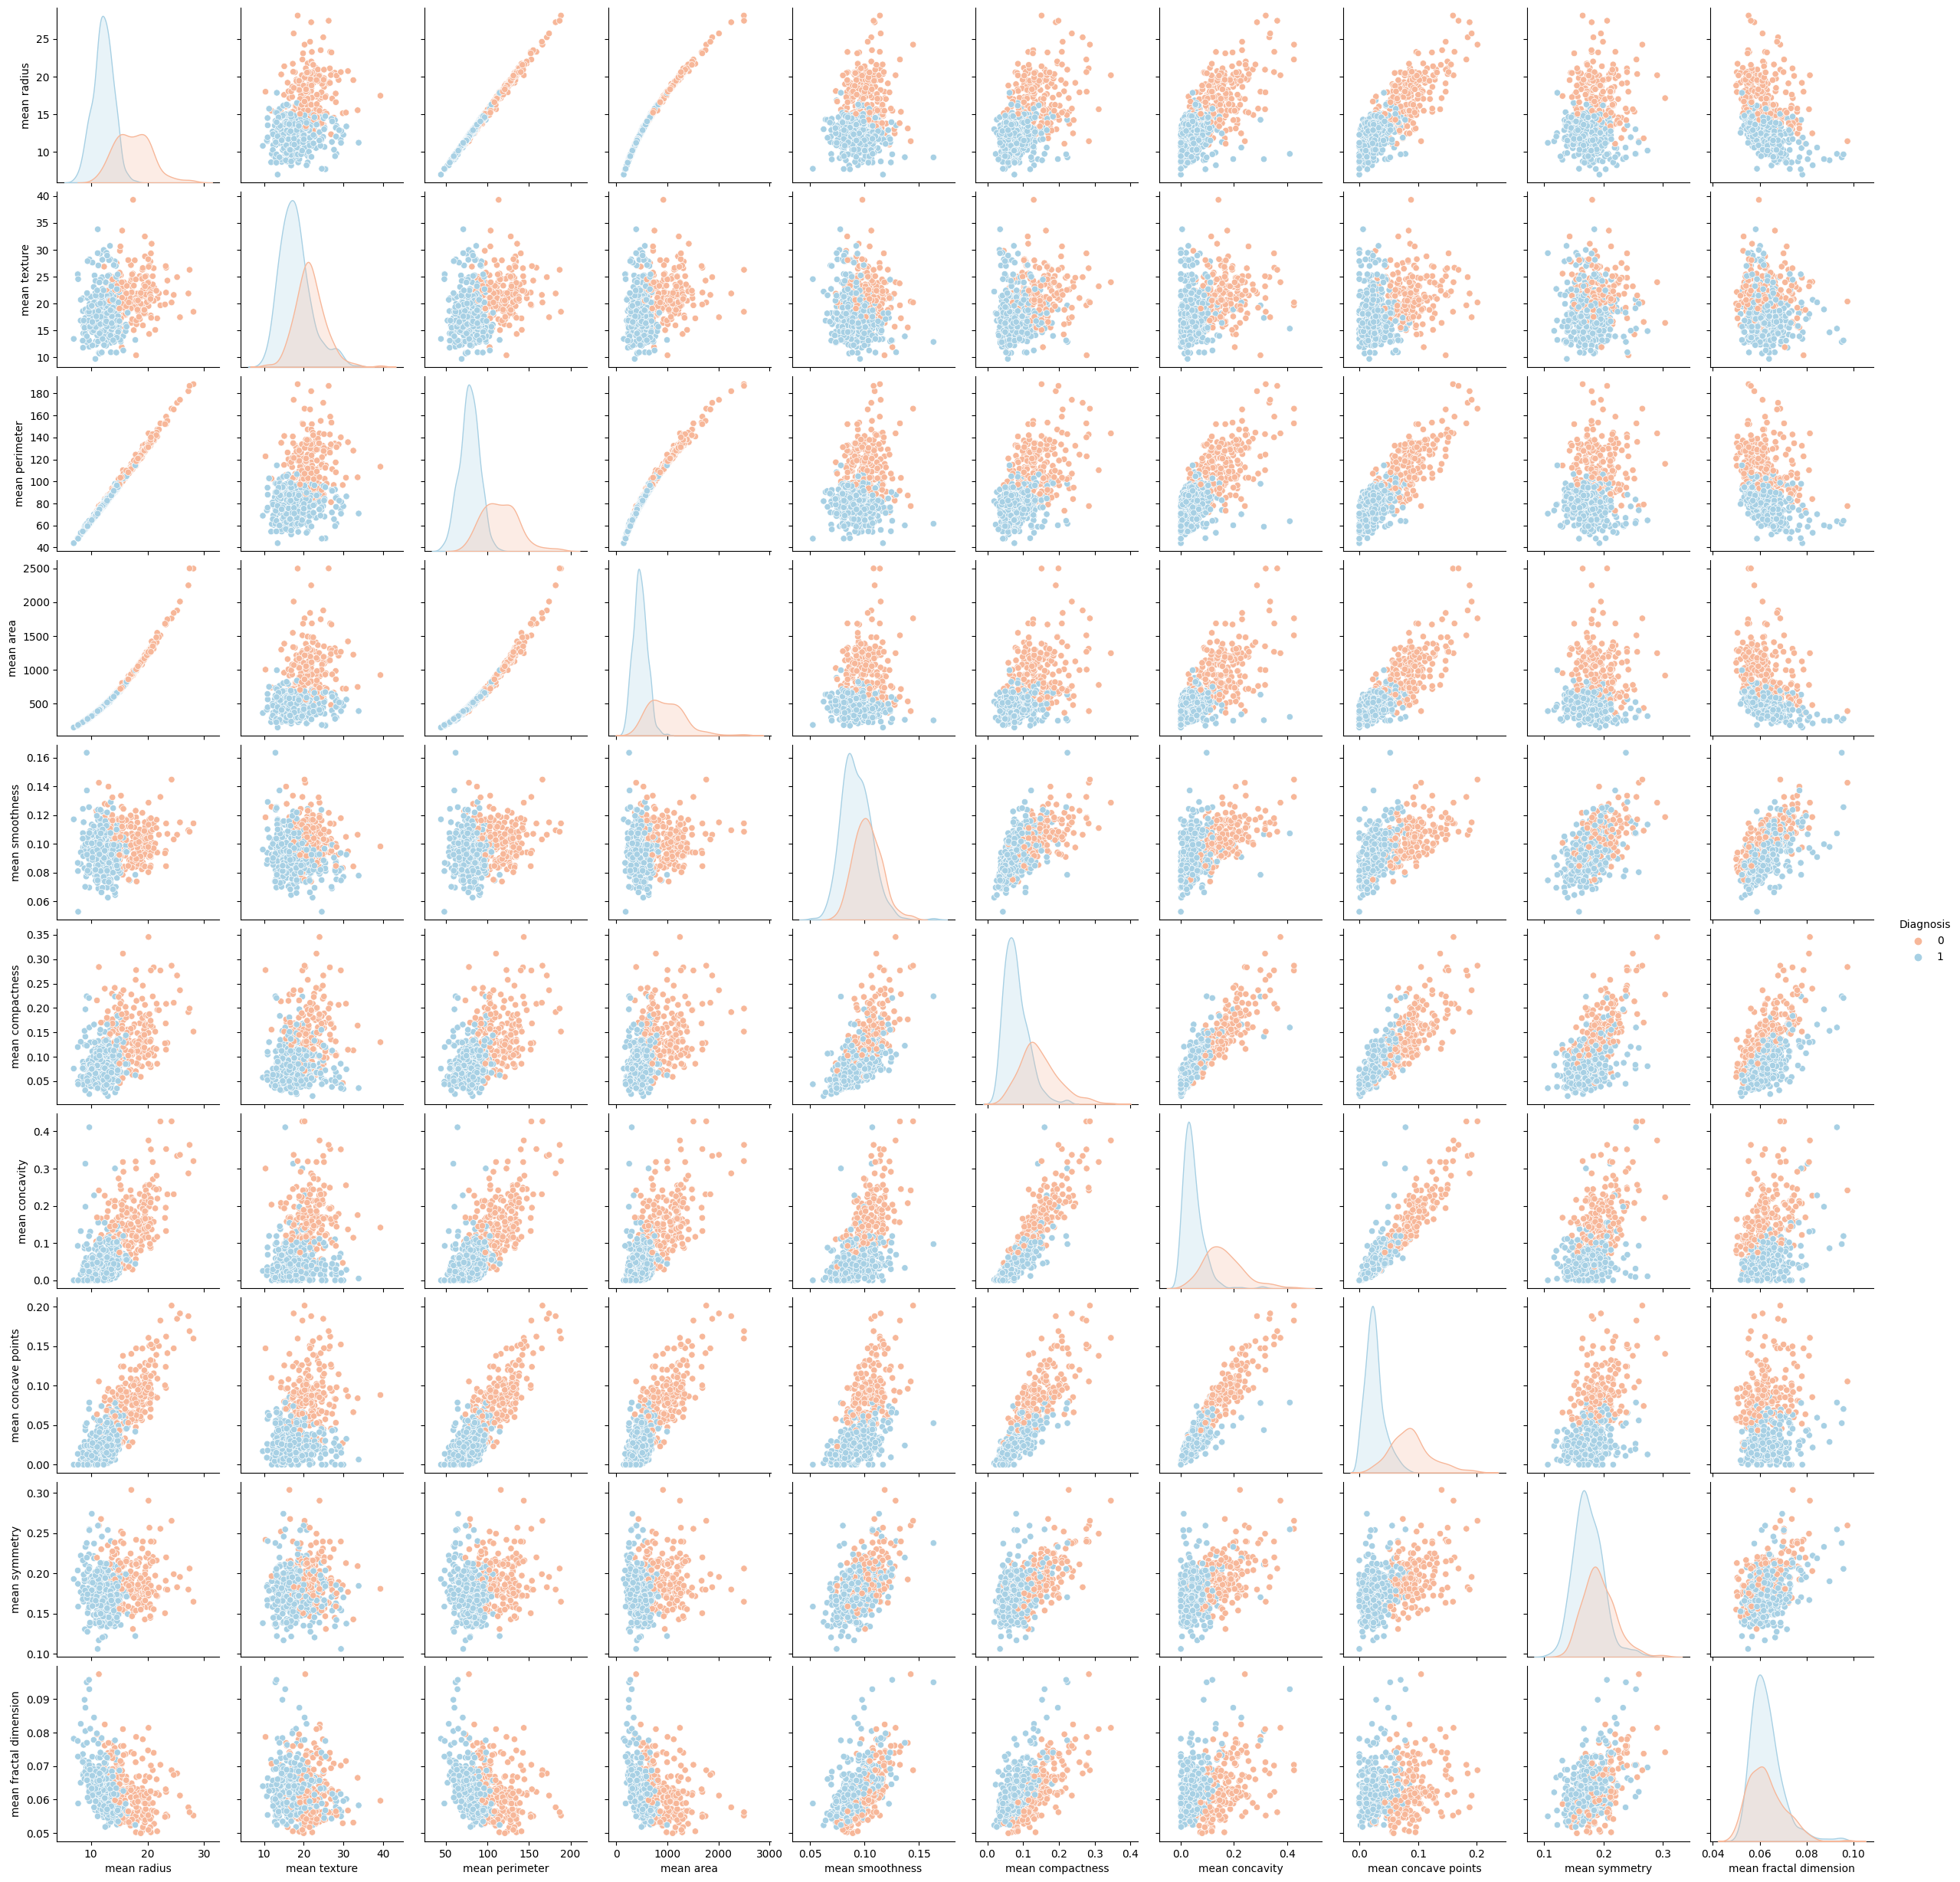

In [ ]:
cols = ['Diagnosis',
        'mean radius',
        'mean texture',
        'mean perimeter',
        'mean area',
        'mean smoothness',
        'mean compactness',
        'mean concavity',
        'mean concave points',
        'mean symmetry',
        'mean fractal dimension']

sns.pairplot(data=bc_df[cols], hue='Diagnosis', palette='RdBu')

<ipython-input-14-32b7ad11a359>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


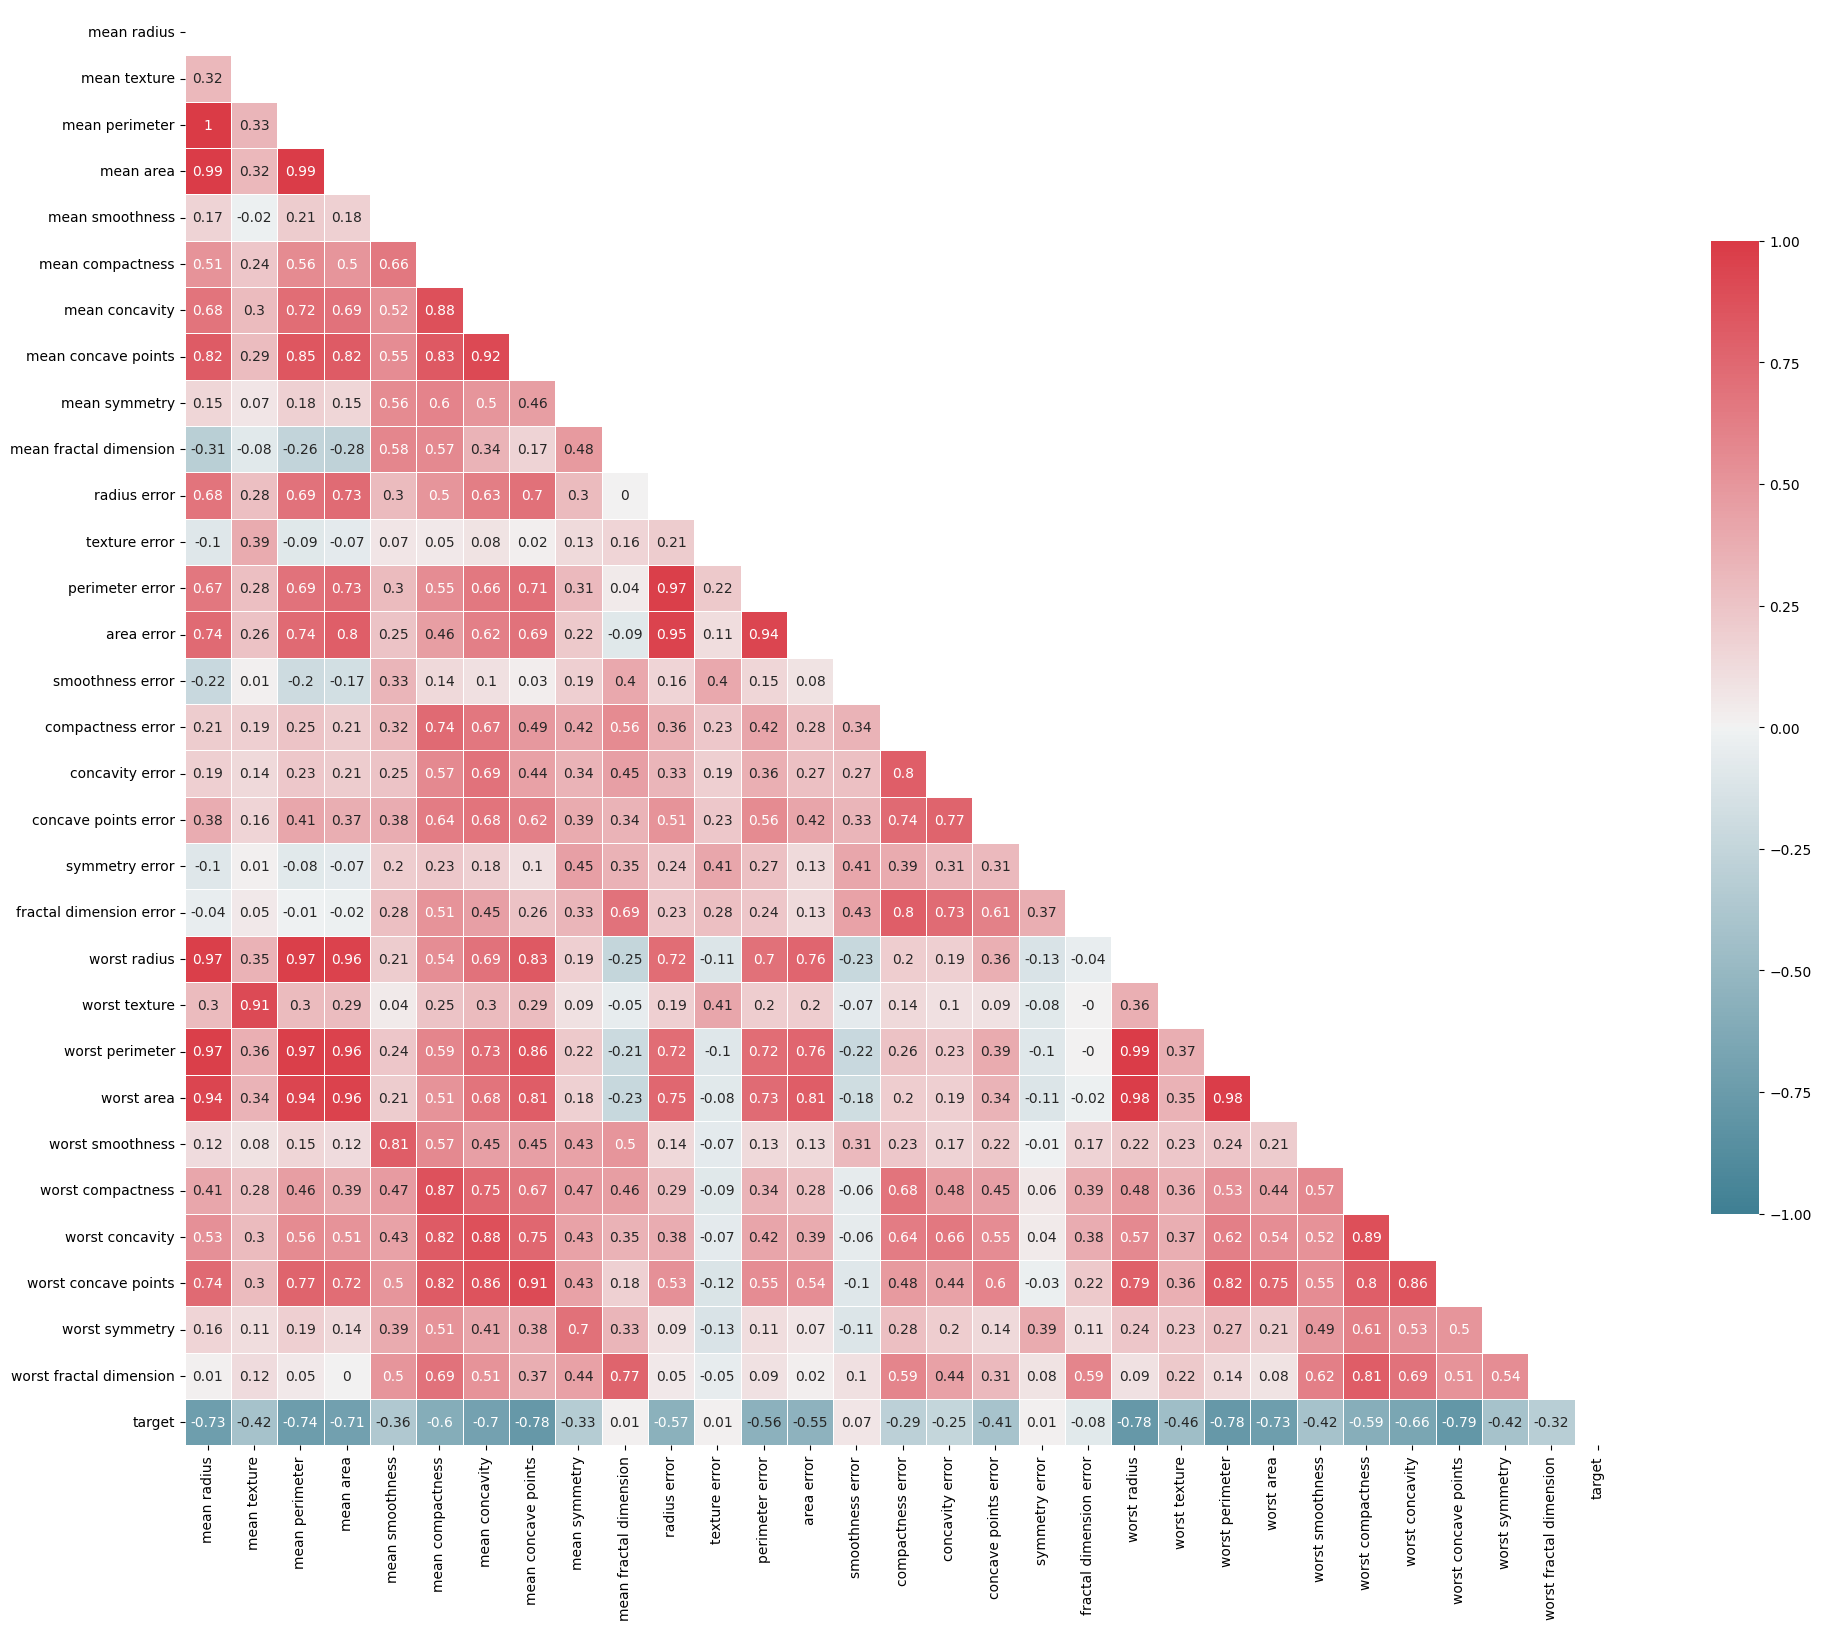

In [ ]:
# Generate and visualize the correlation matrix
corr = bc_df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [ ]:
# first, drop all "worst" columns
#cols = ['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
  #      'worst compactness', 'worst concavity','worst concave points',
   #     'worst symmetry', 'worst fractal dimension']
#bc_df = bc_df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['mean perimeter',
        'perimeter error',
        'mean area',
        'area error']
bc_df = bc_df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['mean concavity',
        'concavity error',
        'mean concave points',
        'concave points error']
bc_df = bc_df.drop(cols, axis=1)

# verify remaining columns
bc_df.columns

KeyError: ignored

<ipython-input-36-ce49bc6d1dd2>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


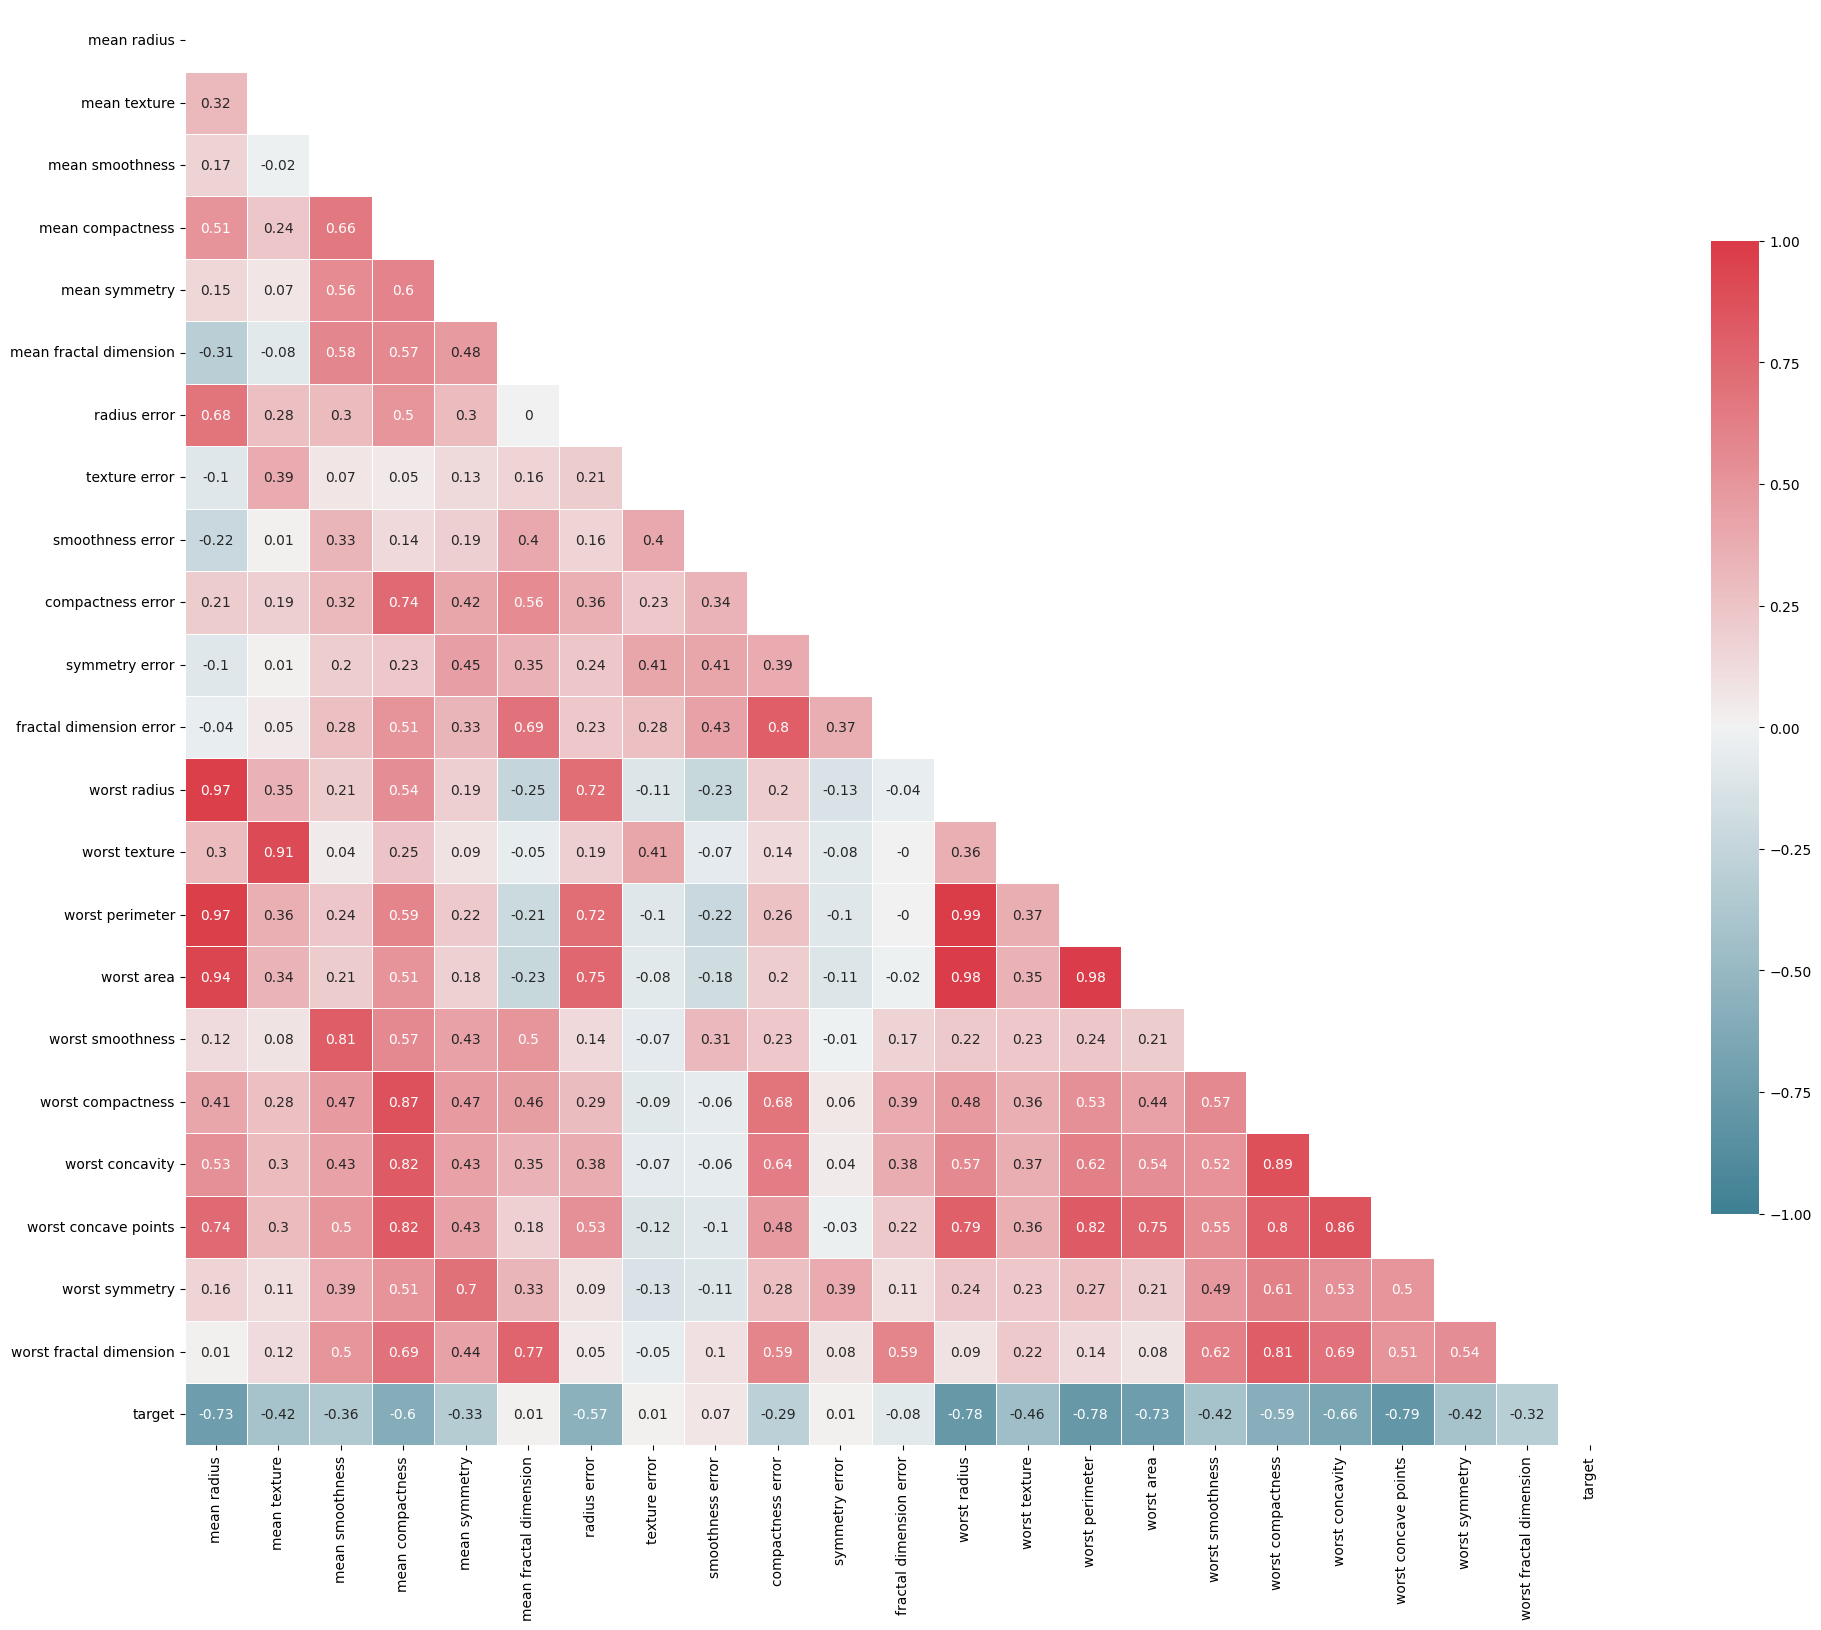

In [ ]:
# Draw the heatmap again, with the new correlation matrix
corr = bc_df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [ ]:
#sotre the feature data
X = bc_df

#store the target data
Y = bc_df['target']

#splict the data using scikit-learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
logreg = KNeighborsClassifier(n_neighbors=6)

logreg.fit(X_train, Y_train)
logreg.score(X_test, Y_test)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f888c6d3280>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


0.9230769230769231

In [ ]:
# Create a string for the formula
cols = bc_df.columns.drop('target')
formula = 'target ~ ' + ' + '.join(cols)
print(formula, '\n')

target ~ mean radius + mean texture + mean smoothness + mean compactness + mean symmetry + mean fractal dimension + radius error + texture error + smoothness error + compactness error + symmetry error + fractal dimension error + worst radius + worst texture + worst perimeter + worst area + worst smoothness + worst compactness + worst concavity + worst concave points + worst symmetry + worst fractal dimension 



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Logistic Regression : (1) creation
lr_bc = LogisticRegression()

In [ ]:
# Logistic Regression: (2) training
logreg.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
Y_predict = logreg.predict(X_test) # prediction on test data

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 0.077, RMSE : 0.277
R^2(Variance score) : 0.639


In [ ]:
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

In [ ]:
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.923, 정밀도: 0.958, 재현율: 0.929,  F1: 0.944


In [ ]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 0.919


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=2)
x_features=['']